In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_pa = pd.read_csv('VMI_Data_PA_V02_AK6.csv')
#df_bp1 = pd.read_csv('VMI_Data_BP1_V02_AK6.csv')
#df_bp2 = pd.read_csv('VMI_Data_BP2_V02_AK6.csv')

In [3]:
df_pa.columns
#df_bp1.columns
#df_bp2.columns

Index(['MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'BP1_LENGTH', 'PA_BUILD_DATE',
       'PA_MACHINEID'],
      dtype='object')

In [4]:
#missing data
total = df_pa.isnull().sum().sort_values(ascending=False)
percent = (df_pa.isnull().sum()/df_pa.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
PA_MACHINEID,1423,1.148164
PA_PART,1423,1.148164
PA_BUILD_DATE,1423,1.148164
PA_BARCODE,1423,1.148164
LFT_SPLICE_LENGTH,572,0.461525
MID_SPLICE_LENGTH,439,0.354212
RHT_SPLICE_LENGTH,31,0.025013
GT_BARCODE,0,0.000000
TIRE_TYPE,0,0.000000
CUT_LENGTH,0,0.000000


In [5]:
#dealing with missing data by dropping columns
#df_pa = df_pa.drop((missing_data[missing_data['Total'] > 1]).index,1)
#df_pa.isnull().sum().max() #just checking that there's no missing data missing...

#dealing with missing data by dropping rows
df_pa = df_pa.dropna()

In [6]:
#missing data
total = df_pa.isnull().sum().sort_values(ascending=False)
percent = (df_pa.isnull().sum()/df_pa.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PA_MACHINEID,0,0.0
PA_S5_L,0,0.0
DATE_TIME_STAMP,0,0.0
GT_BARCODE,0,0.0
TIRE_TYPE,0,0.0
CUT_LENGTH,0,0.0
CONV_WAIT_TIME,0,0.0
LFT_SPLICE_LENGTH,0,0.0
MID_SPLICE_LENGTH,0,0.0
RHT_SPLICE_LENGTH,0,0.0


In [7]:
#df_pa['SPLICE_OK'].describe()
#df_pa['CUT_LENGTH'].describe()
df_pa['CONV_WAIT_TIME'].describe()

count    121483.000000
mean         39.837557
std         175.027149
min           4.799000
25%           5.112000
50%           6.847000
75%          21.508000
max       10000.010000
Name: CONV_WAIT_TIME, dtype: float64

In [8]:
df_pa.columns

Index(['MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'BP1_LENGTH', 'PA_BUILD_DATE',
       'PA_MACHINEID'],
      dtype='object')

In [9]:
df_pa['LFT_SPLICE_DELTA'] = df_pa['LFT_SPLICE_LENGTH'] - (df_pa['SPLICE_LIMIT_LOW'] + df_pa['SPLICE_LIMIT_HIGH'])/2
df_pa['LFT_SPLICE_PREV'] = df_pa.LFT_SPLICE_DELTA.shift(1)
df_pa['LFT_SPLICE_MA5'] = df_pa.LFT_SPLICE_DELTA.rolling(window=5,min_periods=1).mean()
df_pa['LFT_SPLICE_MA10'] = df_pa.LFT_SPLICE_DELTA.rolling(window=10,min_periods=1).mean()
df_pa['LFT_SPLICE_MA20'] = df_pa.LFT_SPLICE_DELTA.rolling(window=20,min_periods=1).mean()
df_pa['LFT_SPLICE_MA50'] = df_pa.LFT_SPLICE_DELTA.rolling(window=50,min_periods=1).mean()


df_pa['MID_SPLICE_DELTA'] = df_pa['MID_SPLICE_LENGTH'] - (df_pa['SPLICE_LIMIT_LOW'] + df_pa['SPLICE_LIMIT_HIGH'])/2
df_pa['MID_SPLICE_PREV'] = df_pa.MID_SPLICE_DELTA.shift(1)
df_pa['MID_SPLICE_MA5'] = df_pa.MID_SPLICE_DELTA.rolling(window=5,min_periods=1).mean()
df_pa['MID_SPLICE_MA10'] = df_pa.MID_SPLICE_DELTA.rolling(window=10,min_periods=1).mean()
df_pa['MID_SPLICE_MA20'] = df_pa.MID_SPLICE_DELTA.rolling(window=20,min_periods=1).mean()
df_pa['MID_SPLICE_MA50'] = df_pa.MID_SPLICE_DELTA.rolling(window=50,min_periods=1).mean()


df_pa['RHT_SPLICE_DELTA'] = df_pa['RHT_SPLICE_LENGTH'] - (df_pa['SPLICE_LIMIT_LOW'] + df_pa['SPLICE_LIMIT_HIGH'])/2
df_pa['RHT_SPLICE_PREV'] = df_pa.RHT_SPLICE_DELTA.shift(1)
df_pa['RHT_SPLICE_MA5'] = df_pa.RHT_SPLICE_DELTA.rolling(window=5,min_periods=1).mean()
df_pa['RHT_SPLICE_MA10'] = df_pa.RHT_SPLICE_DELTA.rolling(window=10,min_periods=1).mean()
df_pa['RHT_SPLICE_MA20'] = df_pa.RHT_SPLICE_DELTA.rolling(window=20,min_periods=1).mean()
df_pa['RHT_SPLICE_MA50'] = df_pa.RHT_SPLICE_DELTA.rolling(window=50,min_periods=1).mean()

In [10]:
df_pa.head

<bound method NDFrame.head of        MACHINE_ID       DATE_TIME_STAMP GT_BARCODE TIRE_TYPE  CUT_LENGTH  \
0             V02   9/1/2018 00:05:28.5    AK6T27O       AK6    1709.019   
1             V02   9/1/2018 00:10:44.0    AK6T27P       AK6    1709.061   
2             V02   9/1/2018 00:13:30.9    AK6T27Q       AK6    1709.131   
3             V02   9/1/2018 00:14:31.7    AK6T27R       AK6    1708.687   
4             V02   9/1/2018 00:16:52.6    AK6T27S       AK6    1708.419   
5             V02   9/1/2018 00:17:54.5    AK6T27T       AK6    1708.447   
6             V02   9/1/2018 00:18:54.2    AK6T27U       AK6    1709.106   
7             V02   9/1/2018 00:19:52.6    AK6T27V       AK6    1708.718   
8             V02   9/1/2018 00:28:40.5    AK6T27W       AK6    1709.039   
9             V02   9/1/2018 00:29:40.4    AK6T27X       AK6    1709.151   
10            V02   9/1/2018 00:30:55.2    AK6T27Y       AK6    1708.513   
11            V02   9/1/2018 00:54:41.7    AK6T27Z       A

In [11]:
#skewness and kurtosis
print("Skewness: %f" % df_pa['CUT_LENGTH'].skew())
print("Kurtosis: %f" % df_pa['CUT_LENGTH'].kurt())

Skewness: -74.471488
Kurtosis: 8529.445281


In [12]:
#skewness and kurtosis
print("Skewness: %f" % df_pa['CONV_WAIT_TIME'].skew())
print("Kurtosis: %f" % df_pa['CONV_WAIT_TIME'].kurt())

Skewness: 31.310200
Kurtosis: 1464.468136


In [13]:
df_pa['LFT_SPLICE_LENGTH'].describe()

count    121483.000000
mean          7.347968
std           2.141180
min         -13.438310
25%           5.981443
50%           7.304719
75%           8.653042
max          34.460590
Name: LFT_SPLICE_LENGTH, dtype: float64

In [14]:
df_pa['MID_SPLICE_LENGTH'].describe()

count    121483.000000
mean         17.108621
std           5.754185
min         -34.990450
25%          15.803170
50%          16.529940
75%          17.254980
max          88.384550
Name: MID_SPLICE_LENGTH, dtype: float64

In [15]:
df_pa['RHT_SPLICE_LENGTH'].describe()

count    121483.000000
mean          7.167675
std           2.165515
min         -58.815900
25%           5.844553
50%           7.094705
75%           8.445475
max          47.205240
Name: RHT_SPLICE_LENGTH, dtype: float64

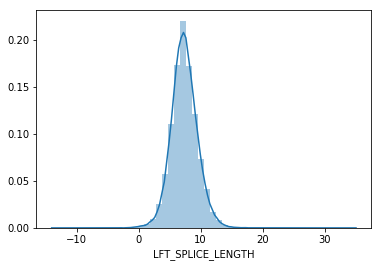

In [16]:
#histogram
sns.distplot(df_pa['LFT_SPLICE_LENGTH']);

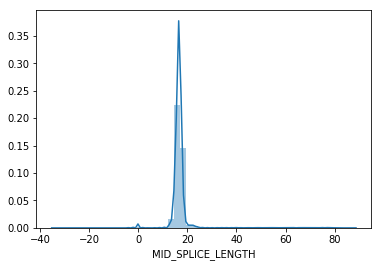

In [17]:
#histogram
sns.distplot(df_pa['MID_SPLICE_LENGTH']);

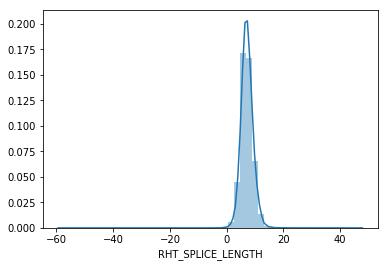

In [18]:
#histogram
sns.distplot(df_pa['RHT_SPLICE_LENGTH']);

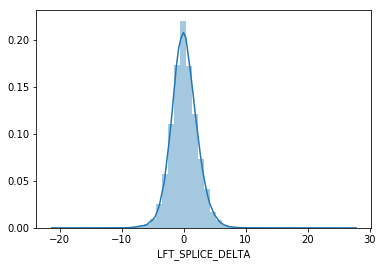

In [19]:
#histogram
sns.distplot(df_pa['LFT_SPLICE_DELTA']);

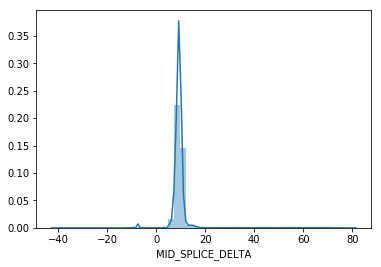

In [20]:
#histogram
sns.distplot(df_pa['MID_SPLICE_DELTA']);

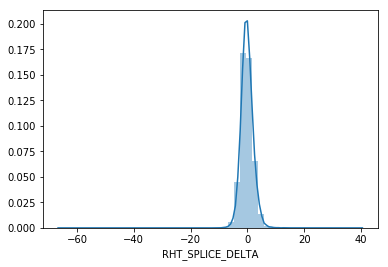

In [21]:
#histogram
sns.distplot(df_pa['RHT_SPLICE_DELTA']);

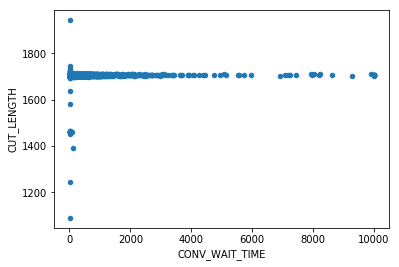

In [22]:
#scatter plot grlivarea/saleprice
var = 'CONV_WAIT_TIME'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

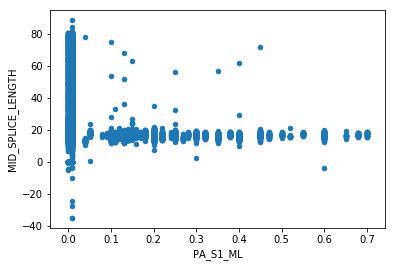

In [23]:
#scatter plot grlivarea/saleprice
var = 'PA_S1_ML'
data = pd.concat([df_pa['MID_SPLICE_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='MID_SPLICE_LENGTH');

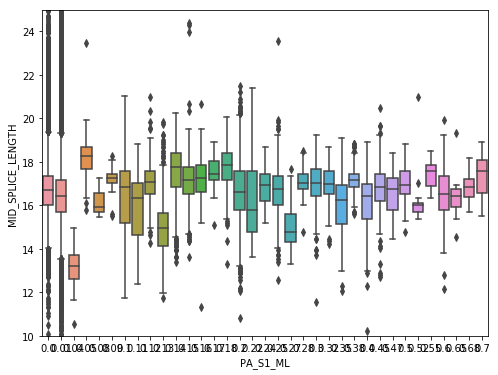

In [24]:
#box plot overallqual/saleprice
var = 'PA_S1_ML'
data = pd.concat([df_pa['MID_SPLICE_LENGTH'], df_pa[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MID_SPLICE_LENGTH", data=data)
fig.axis(ymin=10, ymax=25);

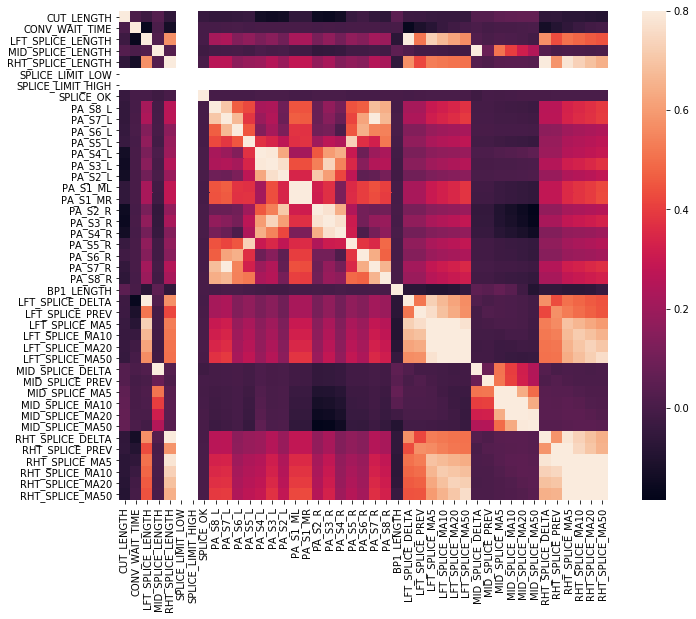

In [25]:
#correlation matrix
corrmat = df_pa.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

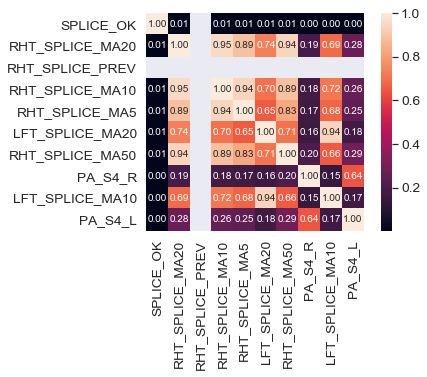

In [26]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SPLICE_OK')['SPLICE_OK'].index
cm = np.corrcoef(df_pa[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [27]:
df_pa.columns

Index(['MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'BP1_LENGTH', 'PA_BUILD_DATE',
       'PA_MACHINEID', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50',
       'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5',
       'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50'],
      dtype='object')

In [28]:
#scatterplot
#sns.set()
#cols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH', 
#        'LFT_SPLICE_DELTA', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
#        'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'MID_SPLICE_LENGTH', 
#        'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L',
#        'PA_S6_L', 'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L',
#        'PA_S1_ML', 'PA_S1_MR', 'PA_S2_R', 'PA_S3_R', 'PA_S4_R',
#        'PA_S5_R', 'PA_S6_R', 'PA_S7_R', 'PA_S8_R']
#sns.pairplot(df_pa[cols], size = 2.5)
#plt.show();

In [29]:
# 'MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
# 'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
# 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
# 'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
# 'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
# 'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
# 'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'PA_BUILD_DATE', 'PA_MACHINEID',
# 'LFT_SPLICE_DELTA', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
# 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50'

data = []
for f in df_pa.columns:
    # Defining the role
    if f == 'SPLICE_OK':
        role = 'target'
    elif f in ['MACHINE_ID','DATE_TIME_STAMP','PA_MACHINEID',
               'PA_BUILD_DATE','PA_BARCODE','PA_PART',
               'GT_BARCODE','TIRE_TYPE']:
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
#    if f == 'CNActivityCycleTime' or f == 'CRActivityCycleTime' or f == 'CNWFCycleTime' or f == 'CRWFCycleTime':
#        level = 'interval'
#    elif f == 'CRNumber' or f == 'CNNumber':
#        level = 'nominal'
#    el
    if f == 'SPLICE_OK':
        level = 'binary'
    elif df_pa[f].dtype == object:
        level = 'nominal'
    elif df_pa[f].dtype == bool:
        level = 'binary'
    elif df_pa[f].dtype == int:
        level = 'interval'
    elif df_pa[f].dtype == float:
        level = 'interval'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f in ['MACHINE_ID','DATE_TIME_STAMP','PA_MACHINEID',
             'PA_BUILD_DATE','PA_BARCODE','PA_PART', 'GT_BARCODE',
             'TIRE_TYPE']:
        keep = False
    
    # Defining the data type 
    dtype = df_pa[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [30]:
meta

,role,level,keep,dtype
varname,,,,
MACHINE_ID,id,nominal,False,object
DATE_TIME_STAMP,id,nominal,False,object
GT_BARCODE,id,nominal,False,object
TIRE_TYPE,id,nominal,False,object
CUT_LENGTH,input,interval,True,float64
CONV_WAIT_TIME,input,interval,True,float64
LFT_SPLICE_LENGTH,input,interval,True,float64
MID_SPLICE_LENGTH,input,interval,True,float64
RHT_SPLICE_LENGTH,input,interval,True,float64


In [31]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index([], dtype='object', name='varname')

In [32]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,8
1,input,interval,41
2,target,binary,1


In [33]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
df_pa[v].describe()

,CUT_LENGTH,CONV_WAIT_TIME,LFT_SPLICE_LENGTH,MID_SPLICE_LENGTH,RHT_SPLICE_LENGTH,SPLICE_LIMIT_LOW,SPLICE_LIMIT_HIGH,PA_S8_L,PA_S7_L,PA_S6_L,...,MID_SPLICE_MA5,MID_SPLICE_MA10,MID_SPLICE_MA20,MID_SPLICE_MA50,RHT_SPLICE_DELTA,RHT_SPLICE_PREV,RHT_SPLICE_MA5,RHT_SPLICE_MA10,RHT_SPLICE_MA20,RHT_SPLICE_MA50
count,121483.00000,121483.000000,121483.000000,121483.000000,121483.000000,121483.0,121483.0,121483.000000,121483.000000,121483.000000,...,121483.000000,121483.000000,121483.000000,121483.000000,121483.000000,121482.000000,121483.000000,121483.000000,121483.000000,121483.000000
mean,1707.13971,39.837557,7.347968,17.108621,7.167675,3.5,11.0,0.007799,0.008895,0.032038,...,9.858648,9.858699,9.858808,9.858954,-0.082325,-0.082297,-0.082229,-0.082127,-0.081948,-0.081473
std,3.96651,175.027149,2.141180,5.754185,2.165515,0.0,0.0,0.031613,0.035186,0.037607,...,2.958590,2.356193,1.942592,1.557673,2.165515,2.165502,1.720120,1.624231,1.549196,1.467618
min,1089.28100,4.799000,-13.438310,-34.990450,-58.815900,3.5,11.0,0.000000,0.000000,0.000000,...,-4.852040,-4.068236,-1.219026,1.522142,-66.065900,-66.065900,-14.786672,-8.953346,-6.346968,-4.770777
25%,1706.35100,5.112000,5.981443,15.803170,5.844553,3.5,11.0,0.000000,0.000000,0.020000,...,8.719347,8.782425,8.874538,9.012396,-1.405447,-1.405447,-1.231808,-1.176893,-1.128945,-1.081258
50%,1707.35800,6.847000,7.304719,16.529940,7.094705,3.5,11.0,0.000000,0.000000,0.020000,...,9.370882,9.435022,9.518121,9.644311,-0.155295,-0.155295,-0.214369,-0.234853,-0.251133,-0.278439
75%,1708.23600,21.508000,8.653042,17.254980,8.445475,3.5,11.0,0.000000,0.000000,0.040000,...,10.046698,10.150150,10.320892,10.420437,1.195475,1.195475,0.926098,0.853982,0.796685,0.722197
max,1943.11200,10000.010000,34.460590,88.384550,47.205240,3.5,11.0,0.200000,0.500000,0.690000,...,44.097310,37.886232,27.091264,23.193301,39.955240,39.955240,11.974854,10.886438,10.279938,7.978172


In [34]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
df_pa[v].describe()

,SPLICE_OK
count,121483.000000
mean,0.000255
std,0.015972
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [35]:
vars_with_missing = []

for f in df_pa.columns:
    #missings = df_pa[df_pa[f] == -1][f].count()
    missings = sum(pd.isnull(df_pa[f]))
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/df_pa.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable LFT_SPLICE_PREV has 1 records (0.00%) with missing values
Variable MID_SPLICE_PREV has 1 records (0.00%) with missing values
Variable RHT_SPLICE_PREV has 1 records (0.00%) with missing values
In total, there are 3 variables with missing values


In [36]:
df_pa.columns

Index(['MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'PA_BUILD_DATE', 'PA_MACHINEID',
       'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50',
       'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5',
       'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50'],
      dtype='object')

In [37]:
df_pa.CUT_LENGTH.describe()

count    121483.00000
mean       1707.13971
std           3.96651
min        1089.28100
25%        1706.35100
50%        1707.35800
75%        1708.23600
max        1943.11200
Name: CUT_LENGTH, dtype: float64

In [38]:
#standardizing data
cut_length_scaled = StandardScaler().fit_transform(df_pa['CUT_LENGTH'][:,np.newaxis]);
low_range = cut_length_scaled[cut_length_scaled[:,0].argsort()][:10]
high_range= cut_length_scaled[cut_length_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-155.76948047]
 [-116.96795958]
 [ -79.66171386]
 [ -64.56626687]
 [ -62.37667576]
 [ -62.21381153]
 [ -62.03708115]
 [ -61.89337741]
 [ -61.78295244]
 [ -61.74942157]]

outer range (high) of the distribution:
[[ 3.24449993]
 [ 3.51980603]
 [ 3.73208418]
 [ 3.89167096]
 [ 4.40673539]
 [ 4.68557106]
 [ 5.20870307]
 [ 7.26164958]
 [ 9.74016082]
 [59.49140203]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


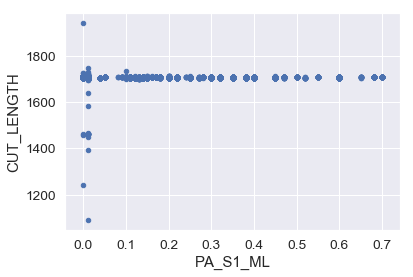

In [39]:
#bivariate analysis saleprice/grlivarea
var = 'PA_S1_ML'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

In [40]:
#deleting points
df_pa.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
df_pa = df_pa.drop(df_pa[df_pa['CUT_LENGTH'] > 1720].index)
df_pa = df_pa.drop(df_pa[df_pa['CUT_LENGTH'] < 1660].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


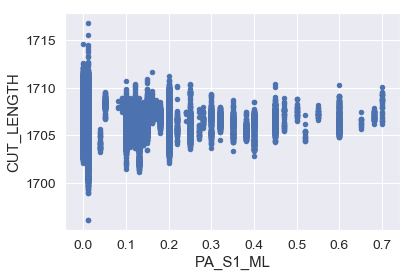

In [41]:
#bivariate analysis saleprice/grlivarea
var = 'PA_S1_ML'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


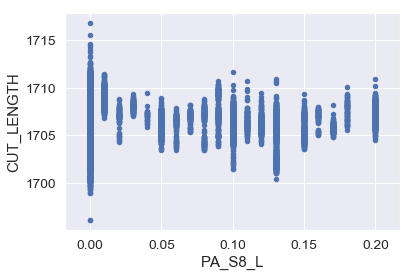

In [42]:
#bivariate analysis saleprice/grlivarea
var = 'PA_S8_L'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

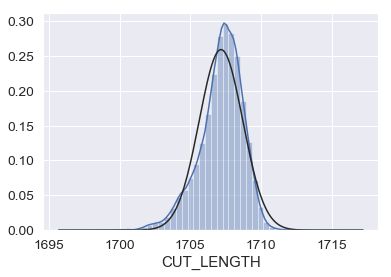

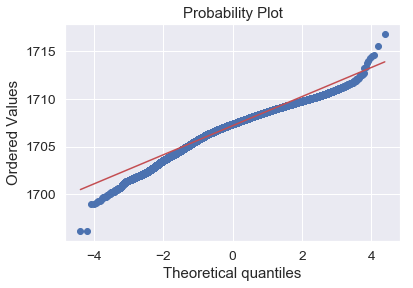

In [43]:
#histogram and normal probability plot
sns.distplot(df_pa['CUT_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['CUT_LENGTH'], plot=plt)

In [44]:
#applying log transformation
df_pa['CUT_LENGTH_LOG'] = np.log(df_pa['CUT_LENGTH'])

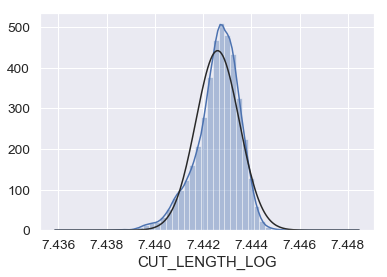

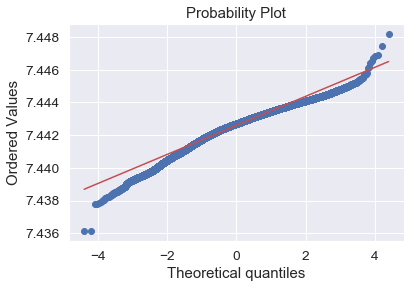

In [45]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['CUT_LENGTH_LOG'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['CUT_LENGTH_LOG'], plot=plt)

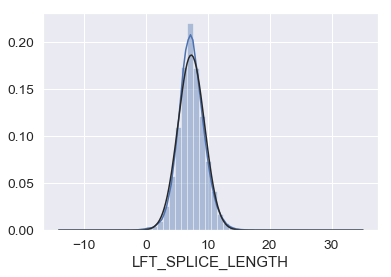

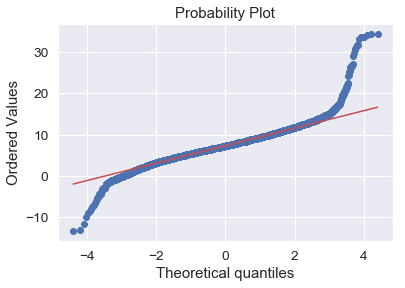

In [46]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['LFT_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['LFT_SPLICE_LENGTH'], plot=plt)

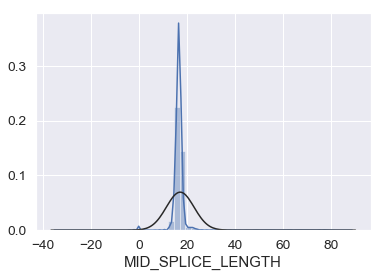

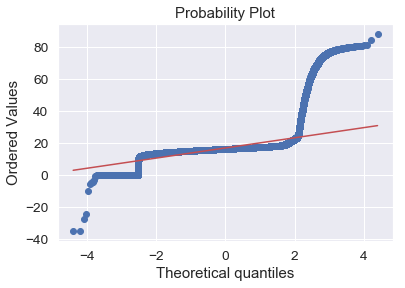

In [47]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['MID_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['MID_SPLICE_LENGTH'], plot=plt)

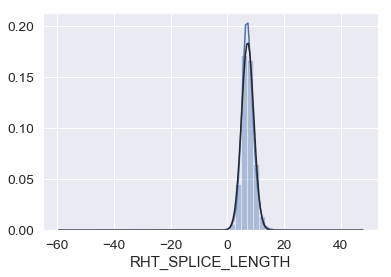

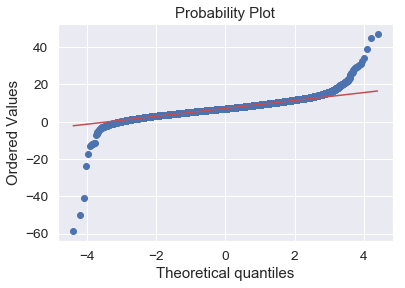

In [48]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['RHT_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['RHT_SPLICE_LENGTH'], plot=plt)

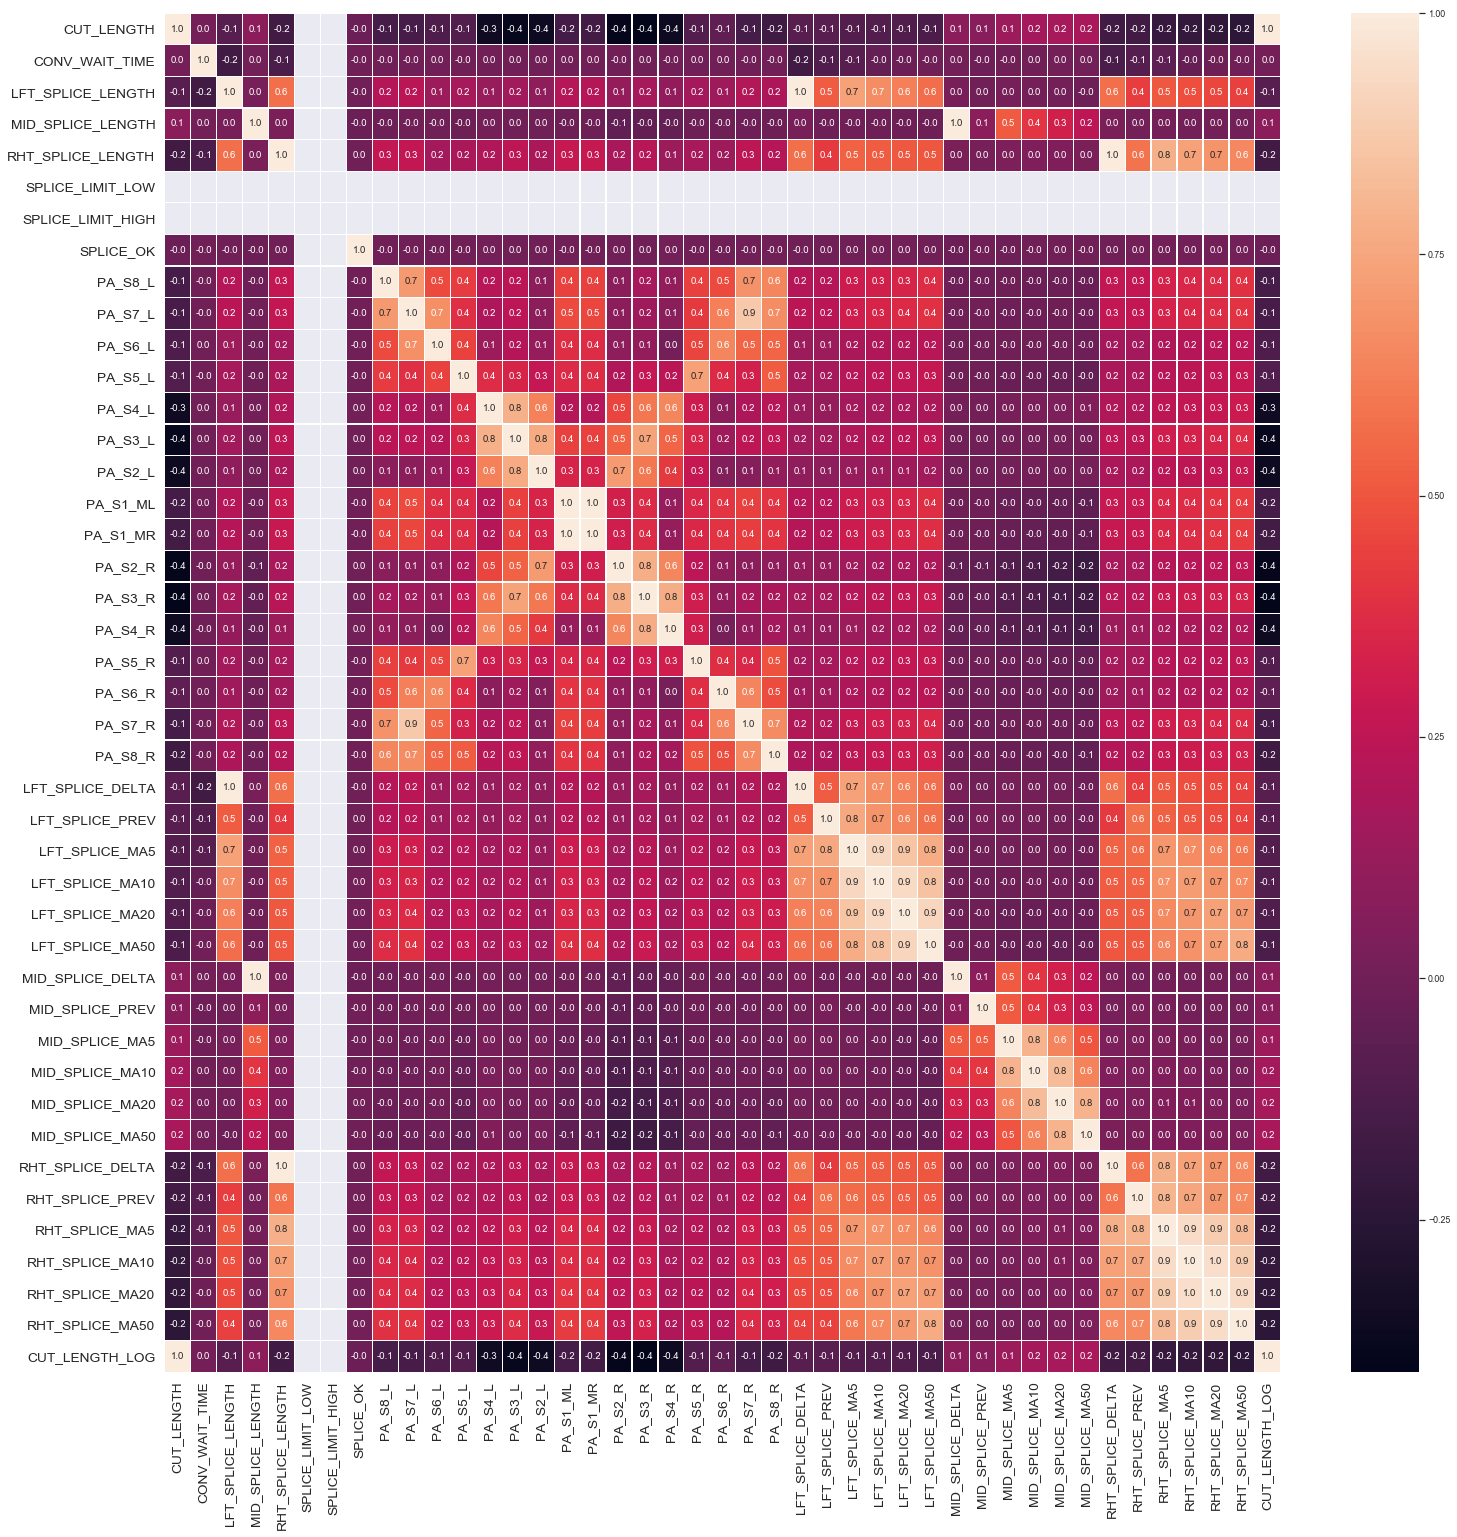

In [49]:
#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale=0.8)
sns.heatmap(df_pa.corr(), annot=True, linewidths=.2, fmt= '.1f',ax=ax)
plt.show()

In [50]:
bins = [df_pa['LFT_SPLICE_LENGTH'].min(),df_pa['SPLICE_LIMIT_LOW'][0],(df_pa['LFT_SPLICE_LENGTH'].mean()-df_pa['LFT_SPLICE_LENGTH'].std()),df_pa['LFT_SPLICE_LENGTH'].mean(),(df_pa['LFT_SPLICE_LENGTH'].mean()+df_pa['LFT_SPLICE_LENGTH'].std()),df_pa['SPLICE_LIMIT_HIGH'][0],df_pa['LFT_SPLICE_LENGTH'].max()]

In [51]:
df_pa.columns

Index(['MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'PA_BUILD_DATE', 'PA_MACHINEID',
       'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50',
       'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5',
       'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50',
       'CUT_LENGTH_LOG'],
      dtype='object')

In [52]:
bins

[-13.438310000000001,
 3.5,
 5.206693001940469,
 7.348010575950402,
 9.489328149960336,
 11,
 34.46059]

In [53]:
bin_names=['Bad','OK','Good','GoodH','OKH','BadH']

In [54]:
bin_names

['Bad', 'OK', 'Good', 'GoodH', 'OKH', 'BadH']

In [63]:
df_pa['LFT_SPLICE_GRADE'] = pd.cut(df_pa['LFT_SPLICE_LENGTH'],bins, labels=bin_names, include_lowest=True).str.replace('H','')
#df_pa['LFT_SPLICE_GRADE'] = pd.cut(df_pa['LFT_SPLICE_LENGTH'],bins, include_lowest=True)

In [65]:
#df_pa['LFT_SPLICE_GRADE']
one_hot=pd.get_dummies(df_pa['LFT_SPLICE_GRADE'])
df_pa = df_pa.drop('LFT_SPLICE_GRADE', axis = 1)
df_pa = df_pa.join(one_hot)


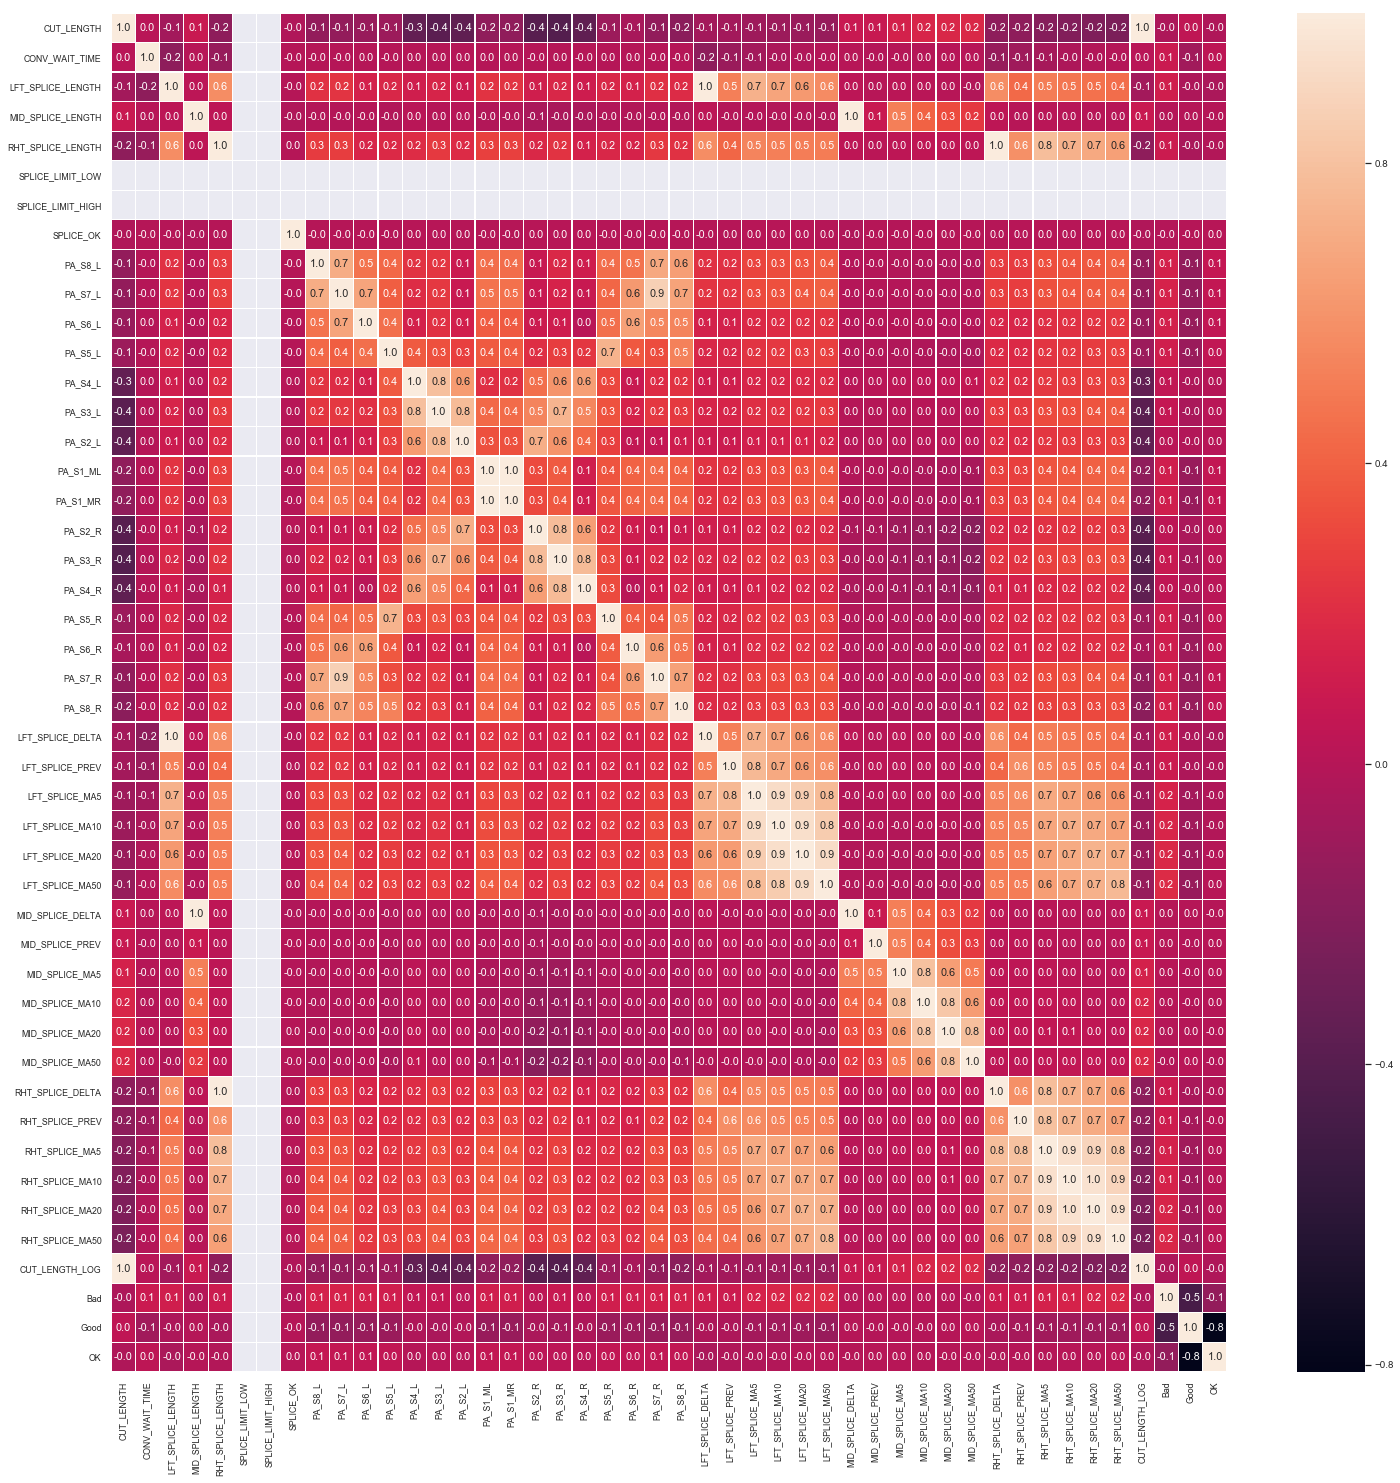

In [67]:
#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale=0.9)
sns.heatmap(df_pa.corr(), annot=True, linewidths=.2, fmt= '.1f',ax=ax)
plt.show()

In [68]:
#from bokeh.charts import HeatMap, bins, output_file, show, vplot
#hm1 = HeatMap(autompg, x=bins('mpg'), y=bins('displ'))

In [ ]:
slopes = df.apply(lambda x: np.polyfit(df.index, x, 1)[0])